#### Problem: Predict the survival of passengers in Titanic.

This project is very famous in Kaggle competition and probably most quoted in datascience community.  
I have scored 0.79426 for this exercise about 7 months ago using python.  I want to see if I could replicate or even do better on the score. 

This exercise closely mimics real life situation where data is dirty as in lots of NANs and missing value.


In [41]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from nameparser import HumanName
import re
import seaborn as sns

# Just importing bunch of usual suspects.

In [42]:
# Reading from csv file and loading into dataframe
train = pd.read_csv("titanic/data/train.csv")
test = pd.read_csv("titanic/data/test.csv")

#### Data Cleaning
Some columns might have NAN's and "Unknowns" etc.


In [43]:
train.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [44]:
# showing empty columns
def show_empty_columns(df):
    cols = df.columns
    empty_cols = {}
    for col in cols:
        count = 0  
        if not df[df[col].isnull()].empty:
            count = len(df[df[col].isnull()].index)
            empty_cols.update({col: count})

    return empty_cols

In [45]:
print show_empty_columns(train)
print show_empty_columns(test)

{'Age': 177, 'Cabin': 687, 'Embarked': 2}
{'Fare': 1, 'Age': 86, 'Cabin': 327}


There are lots of missing values. Age, Cabin, Embarked, Fare are missing.  I somehow have to make an educated guess to find these information. 
I want to see if any of these fields have some affiliation to other fields so I could make an educated guess.  To do so, I will get rid of all the rows that have nan fields and try to visualize the problem. 

In [64]:
# change categorical data to numbers

train["Sex"] = pd.Categorical(train["Sex"])
train["Pclass"] = pd.Categorical(train["Pclass"])


I will pretend that I know nothing about the data.

1. How many male and Female were there?
2. Of those in 1. How many were children and how many were Elderly.

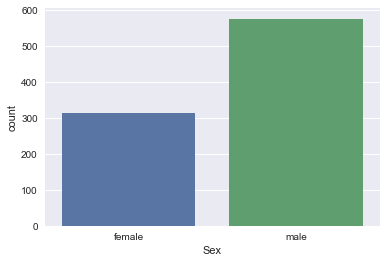

In [65]:
# How many were male and female?

sns.countplot(x="Sex", data=train)
# There were more male then Female

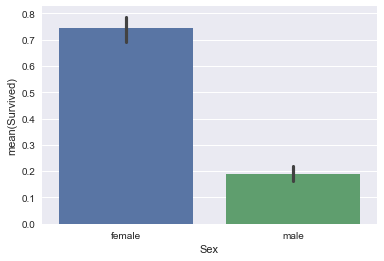

In [68]:
# how much of female and male survived?

sns.barplot(x="Sex", y="Survived", data=train)

# about 20% male and 80% female survived

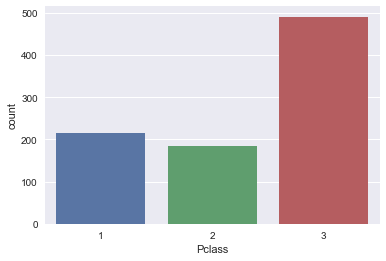

In [69]:
# Does class matter?
# how many classes are there?

sns.countplot(x="Pclass", data=train)
# there are more 3rd classes than 2nd or 1st. 



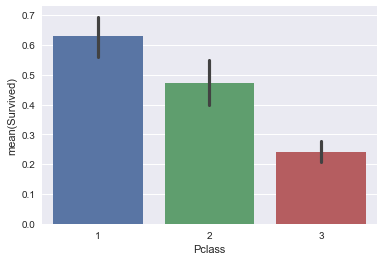

In [70]:
# among the difference classes, how much survived?

sns.barplot(x="Pclass", y="Survived", data=train)

# looks like 1st class survived more. 


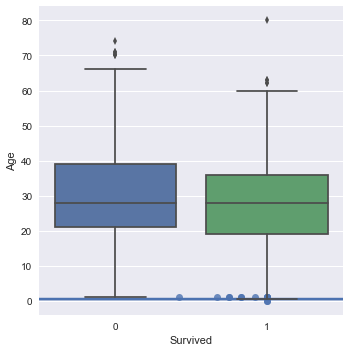

In [73]:
# How about the age of the person?
sns.boxplot(x="Survived", y="Age", data=train)
# I can't really see the relation very well. 
# I will "Clean up" the Age field. 
# For some reason, I think I could guess woman and children first. 

In [80]:
# I could make up another field called Age group
# 0 - 16 I would say children
# 16 - 65 I would say Adult
# 65 and up would be elderly. 
# However, I am noticing a lot of missing values in Age. 
# Is there a way to predict age?
# I am thinking to parse the name to get the title and guess the age. 


def get_title(name):
    s = re.search('.*\,.*?([A-Z]\w*)\..*', name)
    if s:
        return s.group(1)
    else:
        return name


def get_title_nameparser(name):
    # tried using the nameparser but failed since there were some unparseable titles. 
    
    n = HumanName(name)
    return n.title
    
    
def get_title_from_name(df):
    title = df["Name"].apply(get_title)
    df["Title"] = title


get_title_from_name(train)
get_title_from_name(test)

# train[train["Age"].isnull()]

In [83]:
# To guess the age, this looks like another data science project on its own.
# At this point I am not sure as to which fields are related to age. 
# I would like to see the correlation with other fields and see if I could use linear regression or other techniques 

# this will give me basic correlation matrices among continuous variables 
print train.corr()

# What about the nominal(categorical) features?
# in this train.corr(), categorical features are missing. 


 




,PassengerId,Survived,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.077221,-0.035322,0.081629,0.257307
Age,0.036847,-0.077221,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,0.096067,0.159651,0.216225,1.000000


In [90]:
# At this point, I would like to review the types of variables. 

# categorical variables == discrete == qualitative 
# it can be further categorized as nominal, Dichotomous and ordinal. 

# continuous variables == quantitative 
# it can be categorized as interval or ratio

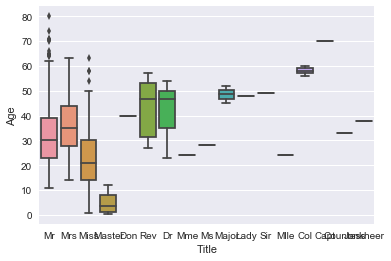

In [97]:
# back to where we were. 
# I can't find the predictors for age.  I need to learn how to find those predictors effectively. 
# In Iris problem, I was having no trouble however, I think I skipped that part. 

sns.boxplot(x="Title", y="Age", data=train)

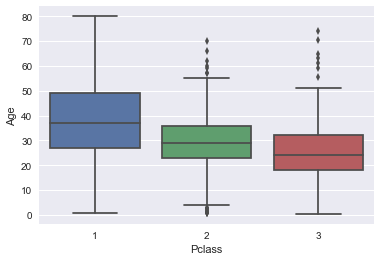

In [98]:
# Pclass vs Age

sns.boxplot(x="Pclass", y="Age", data=train)

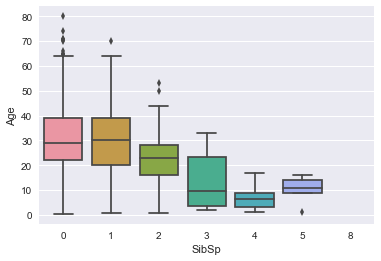

In [99]:
# SibSp vs Age

sns.boxplot(x="SibSp", y="Age", data=train)

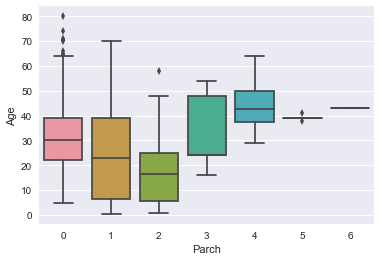

In [100]:
# Parch vs Age

sns.boxplot(x="Parch", y="Age", data=train)

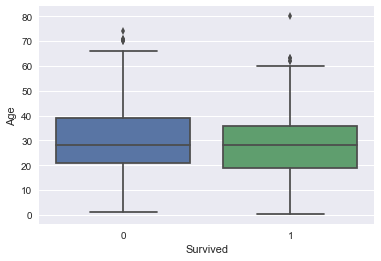

In [103]:
#  Survived vs Age

sns.boxplot(x="Survived", y="Age", data=train)

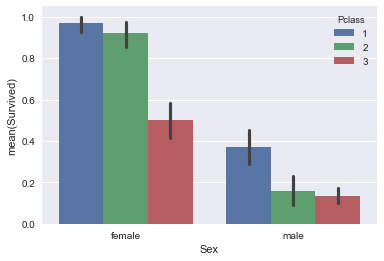

In [76]:
# I am not sure what I am doing.
# I will pause and regroup.
# http://www.johnwittenauer.net/machine-learning-exercises-in-python-part-1/
# looks like a good blog to read. 

